# Chart Setup

## Settings

In [1]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import rcParams
from cycler import cycler
import matplotlib.font_manager as fm

v = (mpl.__version__)
print(f'Matplotlib Version: {v}')

Matplotlib Version: 3.6.2


In [2]:
# Set Matplotlib theme to BMH

plt.style.use("bmh")
sns.set_context("notebook",font_scale=1.4)
sns.set_context(rc={"figure.dpi" : 200})
sns.set_context(rc={"lines.linewidth": 1})
sns.set_palette("deep")

%config InlineBackend.figure_format = "svg"



None


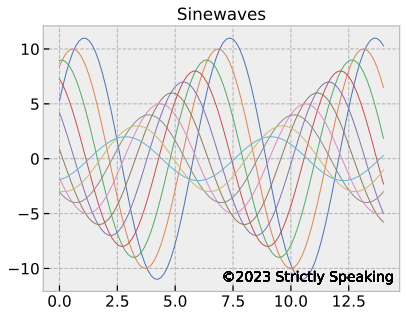

In [3]:
def sinplot(n=10, flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, n + 1):
        plt.plot(x, np.sin(x + i * .5) * (n + 2 - i) * flip)
        plt.title('Sinewaves') # Chart Title
        plt.figtext(x=0.7,y=0.15,s="©2023 Strictly Speaking", fontsize="small", ha='center', va='center', alpha=1, transform=plt.gcf().transFigure) # Watermark


print(sinplot())

## Import Data

### SP 500 Price Data

In [4]:
spx_data = pd.read_csv("../../data/spx.csv")
spx_data.head()

,Date,Open,High,Low,Close
0,01/27/23,4053.72,4094.21,4048.70,4070.56
1,01/26/23,4036.08,4061.57,4013.29,4060.43
2,01/25/23,3982.71,4019.55,3949.06,4016.22
3,01/24/23,4001.74,4023.92,3989.79,4016.95
4,01/23/23,3978.14,4039.31,3971.64,4019.81


In [5]:
spx_data.info()
print('\n')
print(spx_data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    270 non-null    object 
 1    Open   270 non-null    float64
 2    High   270 non-null    float64
 3    Low    270 non-null    float64
 4    Close  270 non-null    float64
dtypes: float64(4), object(1)
memory usage: 10.7+ KB


Index(['Date', ' Open', ' High', ' Low', ' Close'], dtype='object')


### Housing Data

In [6]:
housing = pd.read_csv("../../data/housing.csv")
housing.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Year,Rooms
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,NaN,NaN,0,5,2010,WD,Normal,215000,1999 or older,7 rooms or more
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,MnPrv,NaN,0,6,2010,WD,Normal,105000,1999 or older,6 rooms or less
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,NaN,Gar2,12500,6,2010,WD,Normal,172000,1999 or older,6 rooms or less
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,NaN,NaN,0,4,2010,WD,Normal,244000,1999 or older,7 rooms or more
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,MnPrv,NaN,0,3,2010,WD,Normal,189900,1999 or older,6 rooms or less


In [7]:
print(housing.columns)

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

## Clean Data

The SP 500 Pricing data requires a few modifications.


1) Remove the leading spaces within column names.

2) Change the date column from object type data to datetime data.

In [8]:
spx_data.rename(columns=lambda x: x.strip(), inplace=True)
print(spx_data.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')


In [9]:
spx_data['Date'] = pd.to_datetime(spx_data['Date'])
print(f'The data type is: {spx_data["Date"].dtype}')

The data type is: datetime64[ns]


[]

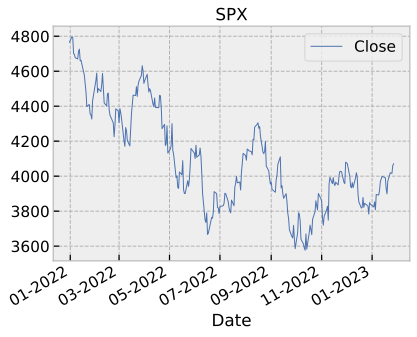

In [10]:
spx_data.plot.line('Date','Close')
plt.title('SPX')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
plt.plot()